# 모델 준비 part 클래스화 하기

In [24]:
import tensorflow as tf
import pandas as pd
import numpy as np

## 아래 코드는 클래스로 작성된 코드와 동일하다.

In [25]:
# 모델을 준비합니다
X = tf.keras.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.Model(X, Y) 

In [26]:
# 위 코드와 동일하다
# 모델을 준비합니다
class MyModel(tf.keras.Model): # tensorflow 모델 상속 받아옴
    def __init__(self, **kwargs): # 초기화 함수
        super(MyModel, self).__init__(**kwargs)
        self.dense = tf.keras.layers.Dense(1) # Y레이어 설정
        
    def call(self, input):# 여기서 input은 X를 받는다.
        Y = self.dense(input) # 여기서 input은 X를 받는다.
        return Y

In [28]:
model = MyModel()
model.compile(loss='mse')

## 히든레이어 2개짜리를 만든다고 할 때,

In [10]:
# 모델을 준비합니다
X = tf.keras.Input(shape=[1])
H = tf.keras.layers.Dense(2, activation='swish')(X)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.Model(X, Y) 

In [11]:
# 위 코드와 동일하다
# 모델을 준비합니다
class MyModel(tf.keras.Model): # tensorflow 모델 상속 받아옴
    def __init__(self, **kwargs): # 초기화 함수
        super(MyModel, self).__init__(**kwargs)
        self.dense1 = tf.keras.layers.Dense(2, activation='swish') # H 레이어 설정
        self.dense2 = tf.keras.layers.Dense(1) # Y 레이어 설정
        
    def call(self, input):# 여기서 input은 X를 받는다.
        H = self.dense1(input) # 여기서 input은 X를 받는다.
        Y = self.dense2(H)
        return Y

In [ ]:
model = MyModel()
model.compile(loss='mse')

# MNIST 예시

In [165]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


```
# 모델 생성
X = tf.keras.Input(shape = [28,28]) 

H = tf.keras.layers.Dense(64, activation=tf.keras.activations.swish)(H)
H = tf.keras.layers.Dense(20, activation=tf.keras.activations.swish)(H)
Y = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)(H)

model = tf.keras.Model(X,Y)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=tf.keras.metrics.SparseCategoricalAccuracy())
model.summary()
```

In [166]:
# 모델 준비
# 클래스화
class MyModel1(tf.keras.Model):
    def __init__(self, **kwargs):
        super(MyModel1, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='swish')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(20, activation='swish')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, X):
        H = self.flatten(X)
        H = self.dense1(H)
        H = self.bn1(H)
        H = self.dense2(H)
        H = self.bn2(H)
        Y = self.dense3(H)
        return Y

In [167]:
# 모델 준비
# 응용 클래스화
class MyModel2(tf.keras.Model):
    def __init__(self, **kwargs):
        super(MyModel2, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='swish')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.dense2 = tf.keras.layers.Dense(20, activation='swish')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    def call(self, X):
        H = self.flatten(X)
        H = self.dense1(H)
        H = self.bn1(H)
        H = self.dense2(H)
        H = self.bn2(H)
        Y = self.dense3(H)
        return Y
    
    # 훈련 스텝
    def train_step(self, batch):
        x_batch, y_batch = batch
        
        with tf.GradientTape() as tape:
                y_pred = self(x_batch, training=True)
                loss = self.compiled_loss(y_batch, y_pred)

        grad = tape.gradient(loss,self.trainable_weights)
        self.optimizer.apply_gradients(zip(grad, self.trainable_weights))
        
        self.compiled_metrics.update_state(y_batch, y_pred)
        return {m.name: m.result() for m in self.metrics}
    
    # 테스트 스탭
    def test_step(self, batch):
        x_batch, y_batch = batch
        y_pred = self(x_batch, training=True)
        self.compiled_metrics.update_state(y_batch, y_pred)
        return {m.name: m.result() for m in self.metrics}

In [168]:
# 모델 생성
model = MyModel1()
model = MyModel2()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.build(input_shape=[None, 28,28])
model.summary()

Model: "my_model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        multiple                  0         
                                                                 
 dense_115 (Dense)           multiple                  50240     
                                                                 
 batch_normalization_70 (Ba  multiple                  256       
 tchNormalization)                                               
                                                                 
 dense_116 (Dense)           multiple                  1300      
                                                                 
 batch_normalization_71 (Ba  multiple                  80        
 tchNormalization)                                               
                                                                 
 dense_117 (Dense)           multiple                  21

In [169]:
x_train, x_val = x_train[:48000], x_train[48000:]
y_train, y_val = y_train[:48000], y_train[48000:]

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.4391 - accuracy: 0.8839 - val_loss: 0.0000e+00 - val_accuracy: 0.9464
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1634 - accuracy: 0.9542 - val_loss: 0.0000e+00 - val_accuracy: 0.9579
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1164 - accuracy: 0.9659 - val_loss: 0.0000e+00 - val_accuracy: 0.9638
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0873 - accuracy: 0.9740 - val_loss: 0.0000e+00 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0724 - accuracy: 0.9784 - val_loss: 0.0000e+00 - val_accuracy: 0.9671
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0000e+00 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0496 - accuracy: 0.9857 - val_loss: 0.0000e+00 -

In [158]:
# # 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 10, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# # 모델 학습
result = model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_split=0.2, callbacks=[early])

Epoch 1/1000
300/300 [==============================] - 3s 9ms/step - loss: 0.0242 - accuracy: 0.9930 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 2/1000
300/300 [==============================] - 2s 8ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0301 - val_accuracy: 0.9901
Epoch 3/1000
300/300 [==============================] - 2s 8ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0368 - val_accuracy: 0.9868
Epoch 4/1000
300/300 [==============================] - 2s 8ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0425 - val_accuracy: 0.9848
Epoch 5/1000
300/300 [==============================] - 2s 8ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0476 - val_accuracy: 0.9831
Epoch 6/1000
300/300 [==============================] - 2s 7ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 7/1000
300/300 [==============================] - 2s 8ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0565 - val_accuracy:

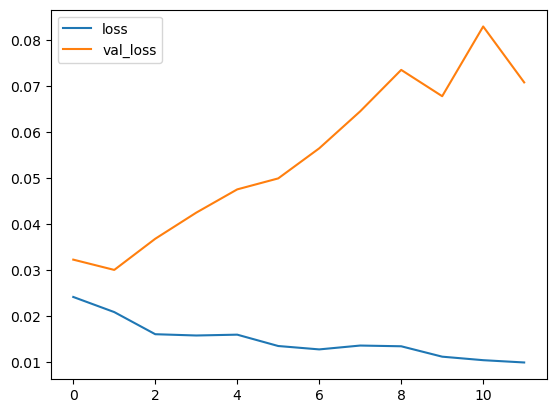

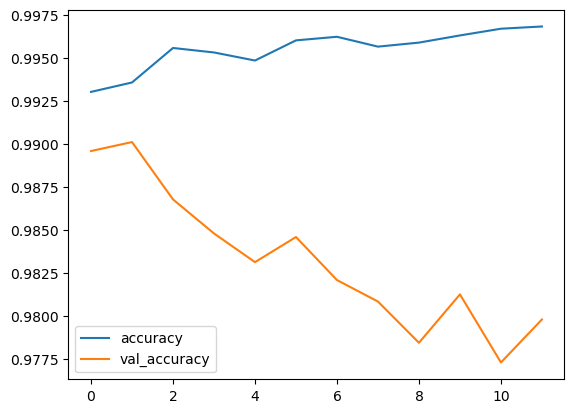

In [159]:
# 학습 시각화
import matplotlib.pyplot as plt

plt. plot(result.history['loss'])
plt. plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt. plot(result.history['accuracy'])
plt. plot(result.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()